In [2]:
import pywt
import matplotlib.pyplot as plt
from numpy import zeros, arange, fft, linspace, pi, cos, sin, sqrt, array, log10, amax, linspace, log10, unwrap, angle, exp, arctan, convolve, correlate
from numpy.random import normal as noise_gaussian
from pathlib import Path
from math import radians
from os import listdir
from os.path import splitext
import ipywidgets as widgets
from IPython.display import display
from multiprocessing.pool import ThreadPool
from time import process_time
%matplotlib widget

Button(description='Select Signal1', style=ButtonStyle())

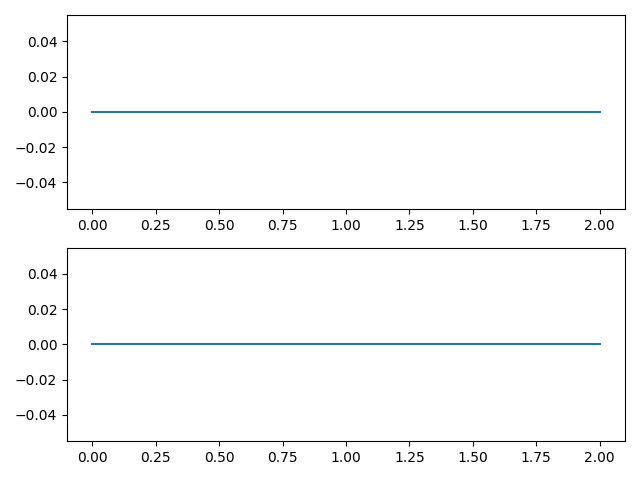

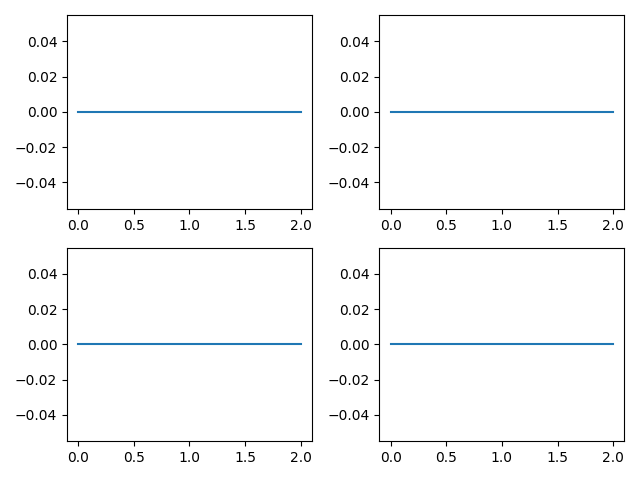

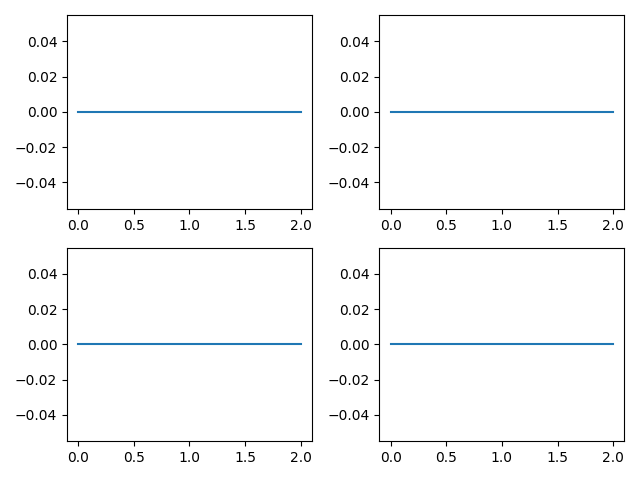

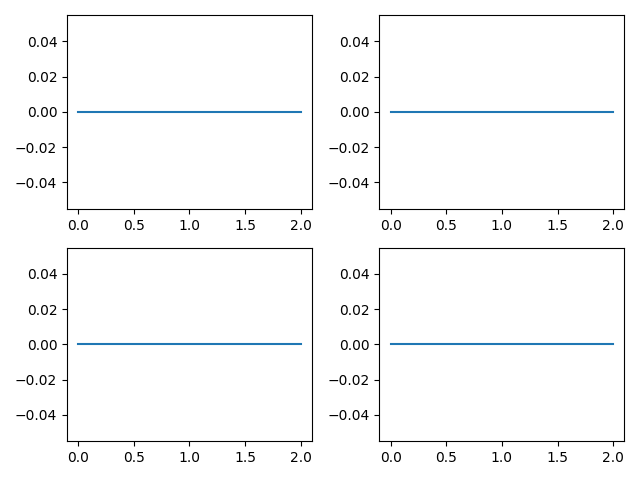

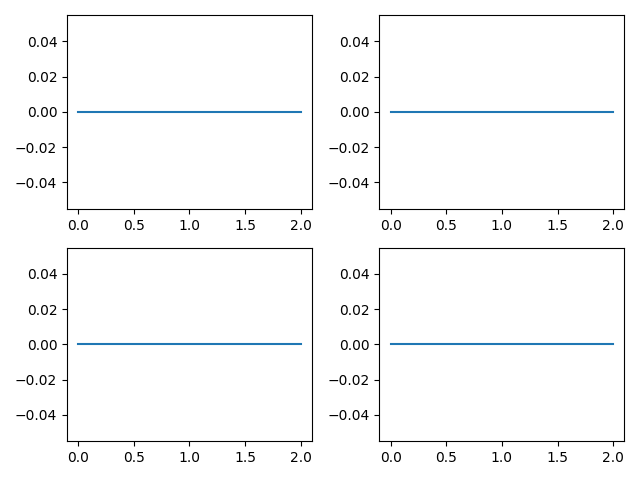

In [4]:
def discretewavelettransfrom(var, waveletfunction, scalingfunction):
    """Calculate the discrete wavelet transform using convolution

    Parameters
    ----------
    var : 1D Array
        Input signal for transform
    waveletfunction : 1D Array
        Wavelet function for the transform, can be picked from the waveletsignalfunction
    scalingfunction : 1D Array
        Scaling function for the transform, can be picked from the scalingsignalfunction

    Returns
    -------
    [1D Array, 1D Array]
        The first array is the detailed coefficient(highpassfilter), and the second is the approximation coefficient(lowpassfilter)
    """
    return convolve(var, waveletfunction, "same"), convolve(var, scalingfunction, "same")

def waveletsignalfunction(wavelettype, waveletlength, waveletscale):
    """Calculate the wavelet signal function for the wavelet transform

    Parameters
    ----------
    wavelettype : String
        Based on the selection on the screen widget, the wavelet type consist of the discrete and continuous wavelet 
    waveletlength : Integer
        Length of the wavelet in sequence
    waveletscale : Integer
        Scale of of the discrete wavelet, the elgnth of the wavelet determined by the 2**waveletscale

    Returns
    -------
    [1D Array, 1D Array]
        The first array return the x axis of the wavelet, the second is the wavelet, both have the same length.
    """
    if wavelettype == "DWT-Haar":
        wavelet = pywt.Wavelet("haar")
        _, waveletfunction, x = wavelet.wavefun(level=waveletscale)
        return x, waveletfunction
    elif wavelettype == "DWT-Symlet-4":
        wavelet = pywt.Wavelet("sym4")
        _, waveletfunction, x = wavelet.wavefun(level=waveletscale)
        return x, waveletfunction

def scalingsignalfunction(wavelettype, waveletlength, waveletscale):
    """Calculate the scaling function that act like lowpassfilter for the discrete wavelet transform

    Parameters
    ----------
    wavelettype : String
        Based on the selection on the screen widget, the wavelet type consist of the discrete and continuous wavelet 
    waveletlength : Integer
        Length of the scaling function in sequence
    waveletscale : Integer
        Scale of of the scaling function, the length of the wavelet determined by the 2**waveletscale

    Returns
    -------
    [1D Array, 1D Array]
        The first array return the x axis of the scaling function, the second is the scaling, both have the same length.
    """
    if wavelettype == "DWT-Haar":
        wavelet = pywt.Wavelet("haar")
        scalingfunction, _, x = wavelet.wavefun(level=waveletscale)
        return x, scalingfunction
    elif wavelettype == "DWT-Symlet-4":
        wavelet = pywt.Wavelet("sym4")
        scalingfunction, _, x = wavelet.wavefun(level=waveletscale)
        return x, scalingfunction

def on_button_clicked(_):
    if selectwavelettype.value == None:
        return

    global temporaryconvolvedsignal
    waveletfunction = []
    scalingfunction = []

    with out:
        fig1.clear()
        ax1 = fig1.add_axes([0.12,0.1,0.85,0.85], xlabel="sequence", ylabel="amplitude", title="Signal")

        fig2.clear()
        ax2 = fig2.add_axes([0.12,0.1,0.85,0.85], xlabel="sequence", ylabel="amplitude", title="Transform Signal")
        selectwaveletscale.value = selectwaveletscale.get_interact_value()+1

        try:
            xaxis, waveletfunction= waveletsignalfunction(
                selectwavelettype.get_interact_value(), 
                selectwaveletlength.get_interact_value(), 
                selectwaveletscale.get_interact_value())
            ax1.plot(xaxis, waveletfunction, label="Wavelet Function")
            ax1.legend()
            selectwaveletlength.value = len(xaxis)
        except Exception as e:
            pass
        
        try:
            xaxis, scalingfunction= scalingsignalfunction(
                selectwavelettype.get_interact_value(), 
                selectwaveletlength.get_interact_value(), 
                selectwaveletscale.get_interact_value())
            ax1.plot(xaxis, scalingfunction, label="Scaling Function")
            ax1.legend()
            selectwaveletlength.value = len(xaxis)
        except Exception as e:
            pass

        if selectwaveletlength.value >= len(temporaryconvolvedsignal[1]):
            out.clear_output()
            print('Length of the wavelet cannot exceed the input length signal! ({})'.format(len(temporaryconvolvedsignal[1])))
            return
        convolvedwaveletsignal, temporaryconvolvedsignal[1] = discretewavelettransfrom(temporaryconvolvedsignal[1], waveletfunction, scalingfunction)
        ax2.plot(temporaryconvolvedsignal[0], convolvedwaveletsignal, label="Convolved Signal")
        out.clear_output()
        print('Using this button enabling convolution of the scaling function to the signal thus making it increasing in level!')
    
    
######################## Declaration
texts_0 = [[], [], []]
texts_1 = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

######################## File Select 
files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".dat":
        temp.append(file)
files_dat = temp
temp = []
for file in files:
    if splitext(file)[1] == ".txt":
        temp.append(file)
files_txt = temp

######################## Widgets File Select
opening_select_signal = widgets.Text(
    value='Please select signal.', 
    disabled=True)
select_frequency_sampling = widgets.IntText(
    value=500,
    description='fs:',
    disabled=False
)
select_dat_file = widgets.Select(
    options=files_dat,
    description='Select .dat File:',
    disabled=False
)
button_select_dat_file = widgets.Button(description='Select .dat File')
def on_button_select_dat_file_clicked(change):
    with open(select_dat_file.get_interact_value(), "r") as file:
        text_file = file.readlines()
    text_file = text_file[2:]
    try:
        for x in text_file:
            temp = x.replace("\n", "")
            temp = temp.split()
            texts_0[0] += [float(temp[0])]
            texts_0[1] += [float(temp[1])]
            texts_0[2] += [float(temp[2])]
    except ValueError:
        print("Please select triple column data file. File Read Error!")
        return
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax[0].set_xlim([0, max(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(texts_0[0], texts_0[2])
        fig_0_ax[1].set_xlim([0, max(texts_0[0])])
        fig_0_ax[1].set_ylim([min(texts_0[2]), max(texts_0[2])])
button_select_dat_file.on_click(on_button_select_dat_file_clicked)
button_select_signal1 = widgets.Button(description='Select Signal1')
def on_button_select_signal1_clicked(change):
    with open(select_txt_file.get_interact_value(), "r") as file:
        text_file = file.readlines()
        text_file = text_file[2:]
    try:
        texts_0[1] = [float(x.replace("\n", "").split()[1]) for x in text_file]
        texts_0[0] = [int(x.replace("\n", "").split()[0]) for x in text_file]
    except ValueError:
        print("Please select double column data file. File Read Error!")
        return
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax[0].set_xlim([min(texts_0[0]), max(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
button_select_signal1.on_click(on_button_select_signal1_clicked)
select_txt_file = widgets.Select(
    options=files_txt,
    description='Select .txt File:',
    disabled=False
)
button_select_txt_file = widgets.Button(description='Select .txt File')
def on_button_select_txt_file_clicked(change):
    with open(select_txt_file.get_interact_value(), "r") as file:
        text_file = file.readlines()
    try:
        for x in text_file:
            temp = x.replace("\n", "")
            temp = temp.split()
            texts_1[0] += [float(temp[0])]
            texts_1[1] += [float(temp[1])]
            texts_1[2] += [float(temp[2])]
            texts_1[3] += [float(temp[3])]
            texts_1[4] += [float(temp[4])]
            texts_1[5] += [float(temp[5])]
            texts_1[6] += [float(temp[6])]
            texts_1[7] += [float(temp[7])]
            texts_1[8] += [float(temp[8])]
            texts_1[9] += [float(temp[9])]
            texts_1[10] += [float(temp[10])]
            texts_1[11] += [float(temp[11])]
            texts_1[12] += [float(temp[12])]
            texts_1[13] += [float(temp[13])]
            texts_1[14] += [float(temp[14])]
    except ValueError:
        print("Please select fifteenth column data file. File Read Error!")
        return
    with out_1:
        plot_2.set_data(texts_1[0], texts_1[1])
        fig_1_ax[0][0].set_xlim([0, max(texts_1[0])])
        fig_1_ax[0][0].set_ylim([min(texts_1[1]), max(texts_1[1])])
        plot_3.set_data(texts_1[0], texts_1[2])
        fig_1_ax[0][1].set_xlim([0, max(texts_1[0])])
        fig_1_ax[0][1].set_ylim([min(texts_1[2]), max(texts_1[2])])
        plot_4.set_data(texts_1[0], texts_1[3])
        fig_1_ax[1][0].set_xlim([0, max(texts_1[0])])
        fig_1_ax[1][0].set_ylim([min(texts_1[3]), max(texts_1[3])])
        plot_5.set_data(texts_1[0], texts_1[4])
        fig_1_ax[1][1].set_xlim([0, max(texts_1[0])])
        fig_1_ax[1][1].set_ylim([min(texts_1[4]), max(texts_1[4])])
    with out_2:
        plot_6.set_data(texts_1[0], texts_1[5])
        fig_2_ax[0][0].set_xlim([0, max(texts_1[0])])
        fig_2_ax[0][0].set_ylim([min(texts_1[5]), max(texts_1[5])])
        plot_7.set_data(texts_1[0], texts_1[6])
        fig_2_ax[0][1].set_xlim([0, max(texts_1[0])])
        fig_2_ax[0][1].set_ylim([min(texts_1[6]), max(texts_1[6])])
        plot_8.set_data(texts_1[0], texts_1[7])
        fig_2_ax[1][0].set_xlim([0, max(texts_1[0])])
        fig_2_ax[1][0].set_ylim([min(texts_1[7]), max(texts_1[7])])
        plot_9.set_data(texts_1[0], texts_1[8])
        fig_2_ax[1][1].set_xlim([0, max(texts_1[0])])
        fig_2_ax[1][1].set_ylim([min(texts_1[8]), max(texts_1[8])])
    with out_3:
        plot_10.set_data(texts_1[0], texts_1[9])
        fig_3_ax[0][0].set_xlim([0, max(texts_1[0])])
        fig_3_ax[0][0].set_ylim([min(texts_1[9]), max(texts_1[9])])
        plot_11.set_data(texts_1[0], texts_1[10])
        fig_3_ax[0][1].set_xlim([0, max(texts_1[0])])
        fig_3_ax[0][1].set_ylim([min(texts_1[10]), max(texts_1[10])])
        plot_12.set_data(texts_1[0], texts_1[11])
        fig_3_ax[1][0].set_xlim([0, max(texts_1[0])])
        fig_3_ax[1][0].set_ylim([min(texts_1[11]), max(texts_1[11])])
        plot_13.set_data(texts_1[0], texts_1[12])
        fig_3_ax[1][1].set_xlim([0, max(texts_1[0])])
        fig_3_ax[1][1].set_ylim([min(texts_1[12]), max(texts_1[12])])
    with out_3:
        plot_14.set_data(texts_1[0], texts_1[13])
        fig_4_ax[0][0].set_xlim([0, max(texts_1[0])])
        fig_4_ax[0][0].set_ylim([min(texts_1[13]), max(texts_1[13])])
        plot_15.set_data(texts_1[0], texts_1[14])
        fig_4_ax[0][1].set_xlim([0, max(texts_1[0])])
        fig_4_ax[0][1].set_ylim([min(texts_1[14]), max(texts_1[14])])
button_select_txt_file.on_click(on_button_select_txt_file_clicked)

######################## Discrete Wavelet Transform
opening_dwt_operations = widgets.Text(
    value='Please Click Button to Perform DWT Operations.', 
    disabled=True)
button_wavelet_and_scaling = widgets.Button(description='Show wavelet and scaling')
def on_change_button_wavelet_and_scaling(change):
    temporaryconvolvedsignal = texts0
    waveletfunction = []
    scalingfunction = []
    
    with out:
        fig1.clear()
        ax1 = fig1.add_axes([0.12,0.1,0.85,0.85], xlabel="sequence", ylabel="amplitude", title="Signal")

        fig2.clear()
        ax2 = fig2.add_axes([0.12,0.1,0.85,0.85], xlabel="sequence", ylabel="amplitude", title="Transform Signal")

        try:
            xaxis, waveletfunction= waveletsignalfunction(
                selectwavelettype.get_interact_value(), 
                selectwaveletlength.get_interact_value(), 
                selectwaveletscale.get_interact_value())
            ax1.plot(xaxis, waveletfunction, label="Wavelet Function")
            ax1.legend()
            selectwaveletlength.value = len(xaxis)
        except Exception as e:
            pass
        
        try:
            xaxis, scalingfunction= scalingsignalfunction(
                selectwavelettype.get_interact_value(), 
                selectwaveletlength.get_interact_value(), 
                selectwaveletscale.get_interact_value())
            ax1.plot(xaxis, scalingfunction, label="Scaling Function")
            ax1.legend()
            selectwaveletlength.value = len(xaxis)
        except Exception as e:
            pass

        if selectwaveletlength.value >= len(temporaryconvolvedsignal[1]):
            out.clear_output()
            print('Length of the wavelet cannot exceed the input length signal! ({})'.format(len(temporaryconvolvedsignal[1])))
            return

        convolvedwaveletsignal, _ = discretewavelettransfrom(temporaryconvolvedsignal[1], waveletfunction, scalingfunction)
        ax2.plot(temporaryconvolvedsignal[0], convolvedwaveletsignal, label="Convolved Signal")
        out.clear_output()
button_wavelet_and_scaling.on_click(on_change_button_wavelet_and_scaling)
button_dwt_operations = widgets.Button(description='DWT')



######################## Widget Outputs
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=2, ncols=1)
    plot_0, = fig_0_ax[0].plot([0,1,2], [0,0,0])
    plot_1, = fig_0_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_1 = widgets.Output()
with out_1:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=2, ncols=2)
    plot_2, = fig_1_ax[0][0].plot([0,1,2], [0,0,0])
    plot_3, = fig_1_ax[0][1].plot([0,1,2], [0,0,0])
    plot_4, = fig_1_ax[1][0].plot([0,1,2], [0,0,0])
    plot_5, = fig_1_ax[1][1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_2 = widgets.Output()
with out_2:
    try:
        plt.close(fig_2)
    except:
        pass
    fig_2, fig_2_ax = plt.subplots(nrows=2, ncols=2)
    plot_6, = fig_2_ax[0][0].plot([0,1,2], [0,0,0])
    plot_7, = fig_2_ax[0][1].plot([0,1,2], [0,0,0])
    plot_8, = fig_2_ax[1][0].plot([0,1,2], [0,0,0])
    plot_9, = fig_2_ax[1][1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_3 = widgets.Output()
with out_3:
    try:
        plt.close(fig_3)
    except:
        pass
    fig_3, fig_3_ax = plt.subplots(nrows=2, ncols=2)
    plot_10, = fig_3_ax[0][0].plot([0,1,2], [0,0,0])
    plot_11, = fig_3_ax[0][1].plot([0,1,2], [0,0,0])
    plot_12, = fig_3_ax[1][0].plot([0,1,2], [0,0,0])
    plot_13, = fig_3_ax[1][1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_4 = widgets.Output()
with out_4:
    try:
        plt.close(fig_4)
    except:
        pass
    fig_4, fig_4_ax = plt.subplots(nrows=2, ncols=2)
    plot_14, = fig_4_ax[0][0].plot([0,1,2], [0,0,0])
    plot_15, = fig_4_ax[0][1].plot([0,1,2], [0,0,0])
    plot_16, = fig_4_ax[1][0].plot([0,1,2], [0,0,0])
    plot_17, = fig_4_ax[1][1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
vertical_box_0 = widgets.VBox([opening_select_signal, 
                               select_frequency_sampling, 
                               select_dat_file,
                               button_select_dat_file])
horizontal_box_0 = widgets.HBox([vertical_box_0, out_0])
vertical_box_1 = widgets.VBox([opening_select_signal, 
                               select_frequency_sampling,
                               select_txt_file, 
                               button_select_txt_file])
horizontal_box_1 = widgets.HBox([vertical_box_1, out_1])
horizontal_box_2 = widgets.HBox([out_2, out_3])
horizontal_box_3 = widgets.HBox([out_4])
display(horizontal_box_0, horizontal_box_1, button_select_signal1, horizontal_box_2, horizontal_box_3)






In [ ]:
selectwavelettype = widgets.Select(
    options=['DWT-Haar', "DWT-Symlet-4"],
    value=None,
    description='Wavelet Type:',
    disabled=False
)

selectwaveletscale = widgets.FloatSlider(
    value=5,
    min=0,
    max=15.0,
    step=0.5,
    description='Wavelet Refinement Scale:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

buttonnextwaveletscale = widgets.Button(
    description='Next Wavelet Scale')
buttonnextwaveletscale.on_click(on_button_clicked)
